# 0. Preparing

LIBRARY IMPORT

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from numpy import sqrt
from numpy import argmax
import statistics

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pip install --user scikit-learn imblearn

     |████████████████████████████████| 226 kB 5.9 MB/s            
     |████████████████████████████████| 9.5 MB 74.8 MB/s            
     |████████████████████████████████| 297 kB 81.8 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn import preprocessing
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

from sklearn.decomposition import PCA

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.utils import class_weight
from sklearn.utils import resample

from sklearn.feature_selection import RFE

In [5]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [6]:
conda install -c conda-forge imbalanced-learn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 22.11.1

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.12.7  |       ha878542_0         143 KB  conda-forge
    certifi-2022.12.7          |     pyhd8ed1ab_0         147 KB  conda-forge
    imbalanced-learn-0.7.0     |             py_1          97 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         387 KB

The following NEW packages will be INSTALLED:

  imbalanced-learn   conda-forge/noarch::imbalanced-learn-0.7.0-py_1

The following packages will be UPDATED:

  ca-certificates           

In [7]:
import imblearn
from imblearn.over_sampling import SMOTE

In [8]:
import time
import datetime
from datetime import date

DATABASE IMPORT

In [9]:
df = pd.read_csv("testungvienviettel.csv")
df.head()

,khachhang,Goi_Data_tn,Goi_Data_tn_1,Tieu_dung_SMS,Luu_luong_GB_Data,Tien_nap_the,tieudung_SMS_1,luuLuong_Data_1,Tien_nap_the_1,tieudung_thoai_noi,...,DOU_MB_data_1thang,DOU_thoai_1thang,ARPU_tong,ARPU_tong_1,ARPU_napthe,ARPU_napthe_1,ARPU_Data,ARPU_Data_1,Tieudung_tang,Phan_nhom
0,KH5590,UMAX90,-,38474.83,7647.16,20044.08,11459.75,0.35,21420.33,13281.59,...,3823.755,33.495,95429.15,146123.81,20044.08,21420.33,21238.65,24302.47,-34.692950,1
1,KH31825,3V120Z,3V120Z,25324.75,1793.42,5757.48,18439.05,0.97,21181.82,44364.62,...,897.195,26.755,118677.46,146515.39,5757.48,21181.82,10920.63,7649.35,-19.000004,2
2,KH13444,ST120KN,ST5K,8039.25,985.73,28014.21,19753.16,1.07,11.30,75213.79,...,493.400,23.440,175181.83,100816.11,28014.21,11.30,16793.83,7177.50,73.763727,3
3,KH2974,-,ST70,26093.08,3012.49,11780.35,21198.27,1.15,1575.27,35916.10,...,1506.820,49.140,104796.41,231385.18,11780.35,1575.27,15143.01,12304.88,-54.709109,1
4,KH12445,V70C,ST5K,35071.77,3330.32,6237.31,36894.87,1.56,6164.22,3162.15,...,1665.940,35.605,73998.70,102057.56,6237.31,6164.22,21637.04,4608.20,-27.493171,2


In [10]:
df.head()

,khachhang,Goi_Data_tn,Goi_Data_tn_1,Tieu_dung_SMS,Luu_luong_GB_Data,Tien_nap_the,tieudung_SMS_1,luuLuong_Data_1,Tien_nap_the_1,tieudung_thoai_noi,...,DOU_MB_data_1thang,DOU_thoai_1thang,ARPU_tong,ARPU_tong_1,ARPU_napthe,ARPU_napthe_1,ARPU_Data,ARPU_Data_1,Tieudung_tang,Phan_nhom
0,KH5590,UMAX90,-,38474.83,7647.16,20044.08,11459.75,0.35,21420.33,13281.59,...,3823.755,33.495,95429.15,146123.81,20044.08,21420.33,21238.65,24302.47,-34.692950,1
1,KH31825,3V120Z,3V120Z,25324.75,1793.42,5757.48,18439.05,0.97,21181.82,44364.62,...,897.195,26.755,118677.46,146515.39,5757.48,21181.82,10920.63,7649.35,-19.000004,2
2,KH13444,ST120KN,ST5K,8039.25,985.73,28014.21,19753.16,1.07,11.30,75213.79,...,493.400,23.440,175181.83,100816.11,28014.21,11.30,16793.83,7177.50,73.763727,3
3,KH2974,-,ST70,26093.08,3012.49,11780.35,21198.27,1.15,1575.27,35916.10,...,1506.820,49.140,104796.41,231385.18,11780.35,1575.27,15143.01,12304.88,-54.709109,1
4,KH12445,V70C,ST5K,35071.77,3330.32,6237.31,36894.87,1.56,6164.22,3162.15,...,1665.940,35.605,73998.70,102057.56,6237.31,6164.22,21637.04,4608.20,-27.493171,2


# 1. Data Preprocessing

In [11]:
#Check số hàng của database
df.shape[0]

33133

In [12]:
#Kiếm tra các cột
df.columns

Index(['khachhang', 'Goi_Data_tn', 'Goi_Data_tn_1', 'Tieu_dung_SMS',
       'Luu_luong_GB_Data', 'Tien_nap_the', 'tieudung_SMS_1',
       'luuLuong_Data_1', 'Tien_nap_the_1', 'tieudung_thoai_noi',
       'Tieudung_thoai_noi_1', 'Tieudung_thoai_ngoai', 'So_ngay_dung_Data',
       'Tieudung_thoai_ngoai_1', 'Luu_luong_phut_thoai_noi',
       'Luu_luong_phut_thoai_noi_1', 'Luu_luong_phut_thoai_ngoai',
       'Luu_luong_phut_thoai_ngoai_1', 'tieudung_Data', 'tieudung_Data_1',
       'Area', 'Age', 'DOU_MB_data_1thang', 'DOU_thoai_1thang', 'ARPU_tong ',
       'ARPU_tong_1', 'ARPU_napthe', 'ARPU_napthe_1', 'ARPU_Data',
       'ARPU_Data_1', 'Tieudung_tang', 'Phan_nhom'],
      dtype='object')

In [13]:
#Tỷ trọng khách hàng và mô tả tập dữ liệu
df['DOU_MB_data_1thang'].describe()

count    33133.000000
mean      6151.371997
std       2523.010445
min         67.720000
25%       4341.775000
50%       6167.910000
75%       7963.580000
max      12197.290000
Name: DOU_MB_data_1thang, dtype: float64

In [14]:
df['DOU_thoai_1thang'].describe()

count    33133.000000
mean        36.159172
std         10.433791
min          2.550000
25%         28.850000
50%         36.120000
75%         43.500000
max         68.730000
Name: DOU_thoai_1thang, dtype: float64

In [15]:
df['ARPU_tong '].describe()

count     33133.000000
mean     141290.097531
std       46914.238892
min       11164.650000
25%      107739.370000
50%      141414.200000
75%      174739.590000
max      273641.520000
Name: ARPU_tong , dtype: float64

In [16]:
df['ARPU_tong_1'].describe()

count     33133.000000
mean     145780.448898
std       47830.459193
min       10801.880000
25%      111658.910000
50%      145884.340000
75%      180003.380000
max      282568.730000
Name: ARPU_tong_1, dtype: float64

In [17]:
df['ARPU_Data'].describe()

count    33133.000000
mean     12369.316768
std       7152.271592
min          0.140000
25%       6136.730000
50%      12391.340000
75%      18546.190000
max      24768.850000
Name: ARPU_Data, dtype: float64

In [18]:
df['ARPU_Data_1'].describe()

count    33133.000000
mean     12362.042186
std       7100.734149
min          1.130000
25%       6258.300000
50%      12408.120000
75%      18506.940000
max      24569.720000
Name: ARPU_Data_1, dtype: float64

In [19]:
df['ARPU_napthe'].describe()

count    33133.000000
mean     14159.378058
std       8191.595098
min          2.110000
25%       7044.790000
50%      14131.600000
75%      21241.830000
max      28432.560000
Name: ARPU_napthe, dtype: float64

In [20]:
df['ARPU_napthe_1'].describe()

count    33133.000000
mean     14218.307849
std       8233.495490
min          0.170000
25%       7091.150000
50%      14179.670000
75%      21388.960000
max      28466.100000
Name: ARPU_napthe_1, dtype: float64

In [17]:
df['Phan_nhom'].value_counts()

2    13584
3    11071
1     8478
Name: Phan_nhom, dtype: int64

b. Xử lý độ tuổi

In [21]:
df['Age'].value_counts()

18    3772
14    3760
16    3748
19    3717
17    3668
21    3655
20    3643
22    3613
15    3557
Name: Age, dtype: int64

In [22]:
df['Area'].value_counts()

Nong_thon    19771
Thanh_thi    13362
Name: Area, dtype: int64

In [25]:
df['Goi_Data_tn'].unique()

array(['UMAX90', '3V120Z', 'ST120KN', '-', 'V70C', 'DLK50', 'ST70N',
       'ECOD10', 'ST5K', 'CT90', 'ST5KM', '6UMAX50N', 'MI3K1', 'V90C',
       'AGG90', 'ST90K', 'ST10K', 'V120K', 'MI5D1', 'ST70K', '1N',
       'ST150K', 'MIMAXDT', 'TRE60', 'ST90N', '6V90C', 'FB7D', 'ST30K',
       'HI20', 'V120N', 'ST90', 'ST70', 'V30X', 'ST120SV', 'ST60N',
       'D500T', 'V150Z', 'V120ZN', '3UMAX90', 'ST15K', 'KIDMAX50', 'V90X',
       'MIF', '4G0', 'MIMAX5N', '6V200C', 'UMAX50N', '6TRE60', 'CN2K',
       '6ST120SV', 'GP_STU', '12V120N', 'MI10D', 'V50C', 'ST90SV',
       'V120C', 'CT50', 'TV120K', '6V120', 'MI2K1', '3V90C', 'V200C',
       '3N', '12ST60N', 'PTO90', '3ST60N', 'MI50K1', 'D1N', '6V120C',
       'MIMAX25', 'TV7K', '12TRE60', 'V150C', 'QNH90', 'DMAX200',
       'V90C_TMDT', 'MI5K1', '6V120N', 'V150C_TMDT', 'NDH50', 'ST120',
       '3V120N', 'MI5S1', 'ECOD20', '3ST120SV', '6ST60N', 'V150N',
       'QBH50', '6UMAX90', 'MIMAX0QT', '12UMAX90', 'MI20', 'MI10K1',
       '12UMAX50N', 'MIMD_H

In [94]:
df['Goi_Data_tn'].value_counts(normalize = True)
#Xét thấy tỉ lệ TRE60 được đăng ký là 4.94%, tỉ lệ cao nhất

-            0.140977
TRE60        0.049407
ST5K         0.046872
V90X         0.040745
ST15K        0.035886
               ...   
MIMAX1.5X    0.000030
3CT50        0.000030
PYN90        0.000030
HT100        0.000030
AGG50        0.000030
Name: Goi_Data_tn, Length: 354, dtype: float64

# 2. Tương quan các biến

2.1. Tương quan tuổi đến các biến còn lại

<AxesSubplot:xlabel='index', ylabel='Age'>

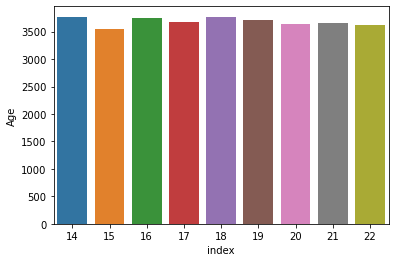

In [27]:
#phân bố tuổi
sns.barplot(data=df['Age'].value_counts().reset_index(), x='index', y='Age')

Số khách hàng ở độ tuổi 16,18,19 chiếm nhiều nhất

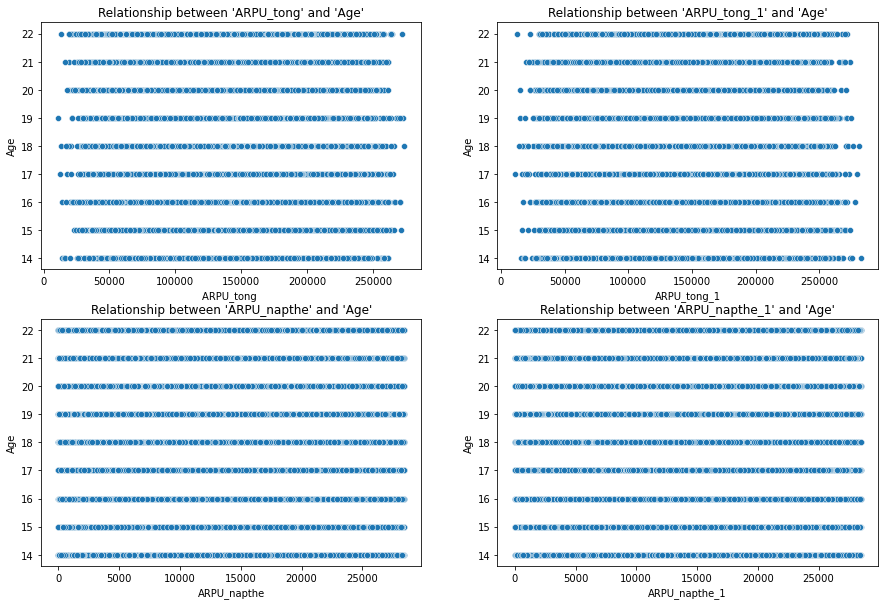

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

sns.scatterplot(ax = axes[0],
                x = "ARPU_tong ",
                y = "Age",
                data = df).set(title = "Relationship between 'ARPU_tong' and 'Age'");

sns.scatterplot(ax = axes[1],
                x = "ARPU_tong_1",
                y = "Age",
                data = df).set(title = "Relationship between 'ARPU_tong_1' and 'Age'");

sns.scatterplot(ax = axes[2],
                x = "ARPU_napthe",
                y = "Age",
                data = df).set(title = "Relationship between 'ARPU_napthe' and 'Age'");

sns.scatterplot(ax = axes[3],
                x = "ARPU_napthe_1",
                y = "Age",
                data = df).set(title = "Relationship between 'ARPU_napthe_1' and 'Age'");

doanh thu từ nạp thẻ: Khách hàng nhóm 14-22 tuổi phân bổ đồng đều đến doanh thu 
Doanh thu từ tổng tiêu dùng: Vẫn là nhóm khách hàng 16,18,19 chiếm doanh thu lớn nhất cũng như có tỷ trọng khách hàng cao nhất so với phần còn lại

In [30]:
df.columns

Index(['khachhang', 'Goi_Data_tn', 'Goi_Data_tn_1', 'Tieu_dung_SMS',
       'Luu_luong_GB_Data', 'Tien_nap_the', 'tieudung_SMS_1',
       'luuLuong_Data_1', 'Tien_nap_the_1', 'tieudung_thoai_noi',
       'Tieudung_thoai_noi_1', 'Tieudung_thoai_ngoai', 'So_ngay_dung_Data',
       'Tieudung_thoai_ngoai_1', 'Luu_luong_phut_thoai_noi',
       'Luu_luong_phut_thoai_noi_1', 'Luu_luong_phut_thoai_ngoai',
       'Luu_luong_phut_thoai_ngoai_1', 'tieudung_Data', 'tieudung_Data_1',
       'Area', 'Age', 'DOU_MB_data_1thang', 'DOU_thoai_1thang', 'ARPU_tong ',
       'ARPU_tong_1', 'ARPU_napthe', 'ARPU_napthe_1', 'ARPU_Data',
       'ARPU_Data_1', 'Tieudung_tang', 'Phan_nhom'],
      dtype='object')

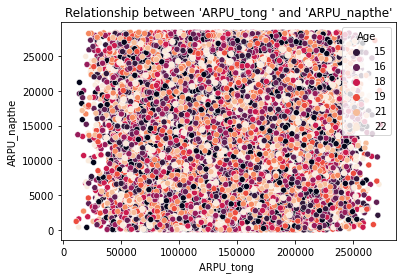

In [32]:
sns.scatterplot(x = "ARPU_tong ",
                y = "ARPU_napthe",
                hue = "Age",
                palette = "rocket",
                data = df).set(title = "Relationship between 'ARPU_tong ' and 'ARPU_napthe'");

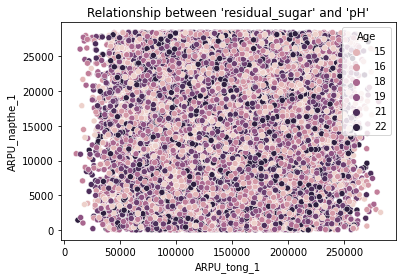

In [33]:
sns.scatterplot(x = "ARPU_tong_1",
                y = "ARPU_napthe_1",
                hue = "Age",
                data = df).set(title = "Relationship between 'residual_sugar' and 'pH'");

Ta có thể thấy biến Age phân bổ khá đều đến doanh thu tổng tiêu dùng và doanh thu nạp thẻ nên có thể nói biến Age không ảnh hưởng nhiều đến doanh thu.

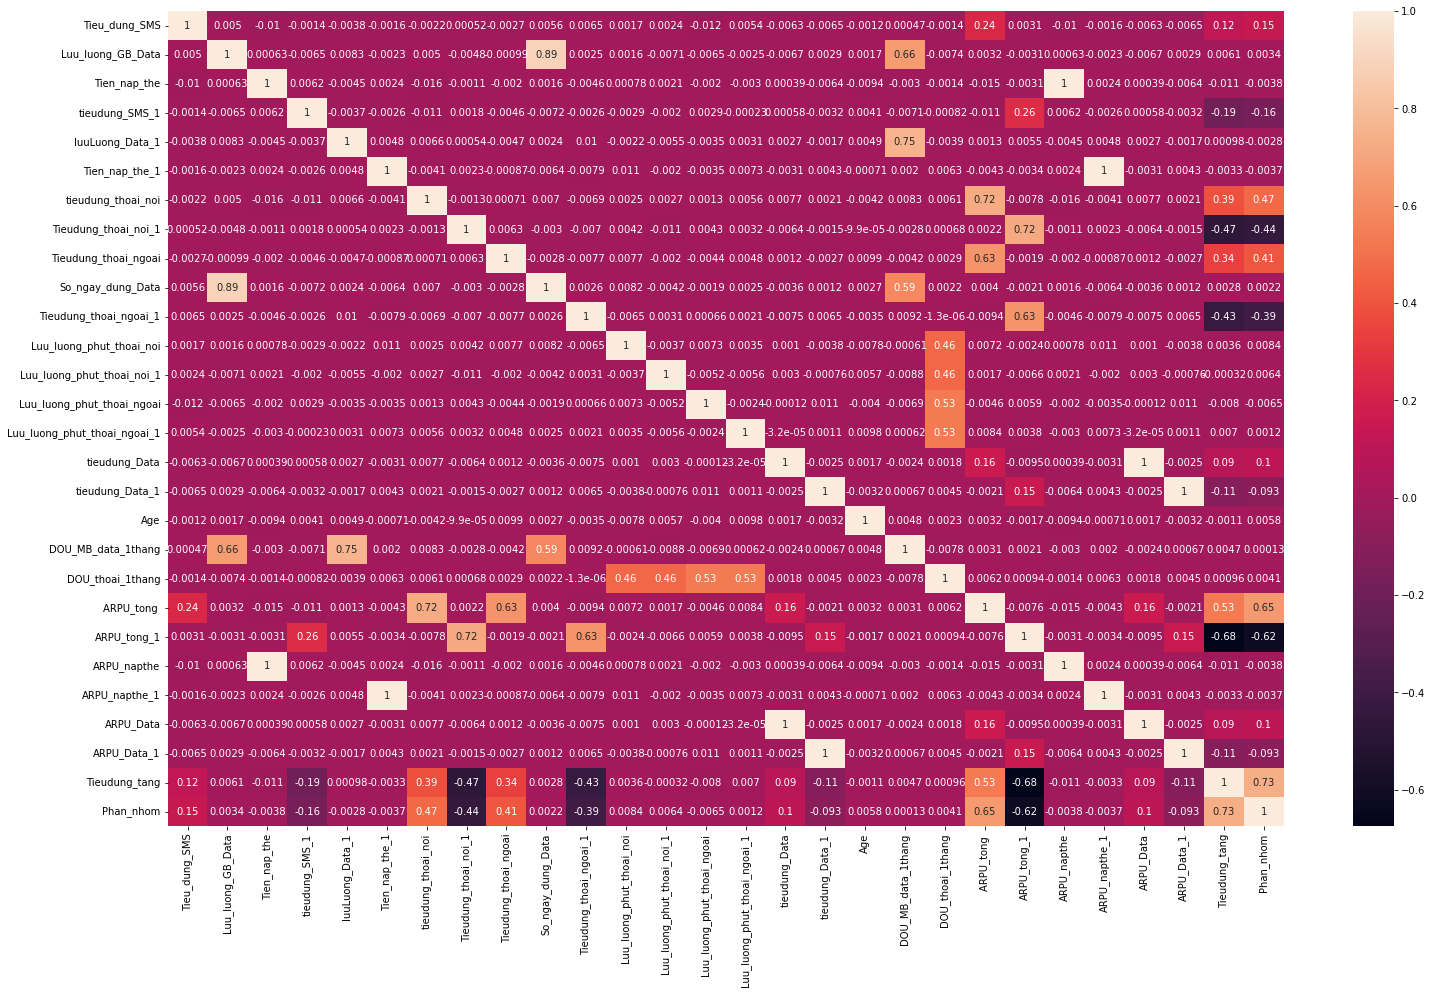

In [34]:
plt.figure(figsize = [25, 15], facecolor = 'white')
sns.heatmap(df.corr(), annot=True);

Từ biểu đồ trên, ta thấy:
Các biến chủ yếu có độ tương quan khá thấp (nhỏ hơn 0.6), riêng chỉ có 2 trường hợp đặc biệt:

Biến Phan_nhom và ARPU tổng của 2 tháng  có mức độ tương quan cao (0.65-0.68).

Ta thấy rằng:
cột Tieu_dung_thoai_ngoai_1 và Tieudung_thoai_noi_1 có tương quan ngược ở mức trung bình (-0.47), tức là Tieu_dung_thoai_ngoai càng lớn thì càng nhóm càng nhỏ và ngược lại. Tức là tiêu dùng cho gọi thoại và nội càng cao thì càng có xu hướng ít dùng dần đi trong các tháng tiếp theo. Thật vậy, tháng sau ít dùng thoại nội và ngoại đi, em sẽ chứng minh ở mục 3.2.

Kết luận về độ tuổi: 

Biến Age hầu như không tương quan hoặc tương quan cực thấp với bất cứ biến nào nên có thể nói trong dữ liệu này, cộng với việc phân tích bên trên là biến Age phân bổ khá đồng đều đến doanh thu nên biến Age không ảnh hưởng nhiều đến hành vi người dùng. Số người dùng ở nhóm độ tuổi 16,18,19 hiện đang chiếm tỷ trọng sử dụng cũng như doanh thu nhiều nhất.

2.2. Tương quan khu vực đến các biến còn lại 

<AxesSubplot:xlabel='index', ylabel='Area'>

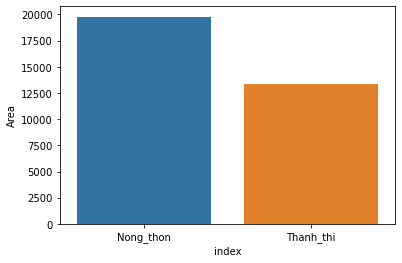

In [37]:
sns.barplot(data=df['Area'].value_counts().reset_index(), x='index', y='Area')

Khách hàng ở nông thôn chiếm tỷ trọng gấp rưỡi thành thị

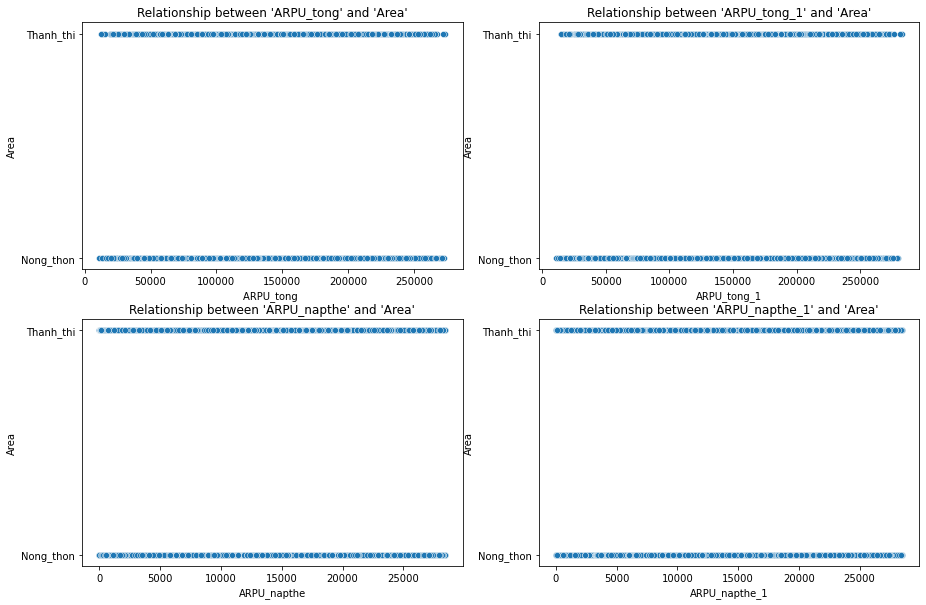

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

sns.scatterplot(ax = axes[0],
                x = "ARPU_tong ",
                y = "Area",
                data = df).set(title = "Relationship between 'ARPU_tong' and 'Area'");

sns.scatterplot(ax = axes[1],
                x = "ARPU_tong_1",
                y = "Area",
                data = df).set(title = "Relationship between 'ARPU_tong_1' and 'Area'");

sns.scatterplot(ax = axes[2],
                x = "ARPU_napthe",
                y = "Area",
                data = df).set(title = "Relationship between 'ARPU_napthe' and 'Area'");

sns.scatterplot(ax = axes[3],
                x = "ARPU_napthe_1",
                y = "Area",
                data = df).set(title = "Relationship between 'ARPU_napthe_1' and 'Area'");

Các mức doanh thu của cả ở nông thôn và thành thị được phân bố đều như nhau

In [55]:
df.columns

Index(['khachhang', 'Goi_Data_tn', 'Goi_Data_tn_1', 'Tieu_dung_SMS',
       'Luu_luong_GB_Data', 'Tien_nap_the', 'tieudung_SMS_1',
       'luuLuong_Data_1', 'Tien_nap_the_1', 'tieudung_thoai_noi',
       'Tieudung_thoai_noi_1', 'Tieudung_thoai_ngoai', 'So_ngay_dung_Data',
       'Tieudung_thoai_ngoai_1', 'Luu_luong_phut_thoai_noi',
       'Luu_luong_phut_thoai_noi_1', 'Luu_luong_phut_thoai_ngoai',
       'Luu_luong_phut_thoai_ngoai_1', 'tieudung_Data', 'tieudung_Data_1',
       'Area', 'Age', 'DOU_MB_data_1thang', 'DOU_thoai_1thang', 'ARPU_tong ',
       'ARPU_tong_1', 'ARPU_napthe', 'ARPU_napthe_1', 'ARPU_Data',
       'ARPU_Data_1', 'Tieudung_tang', 'Phan_nhom'],
      dtype='object')

<BarContainer object of 2 artists>

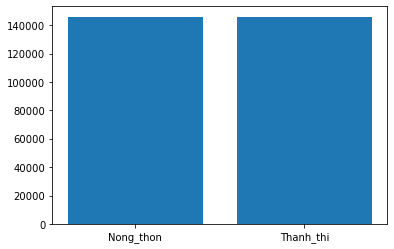

In [59]:
Area_group = df.groupby('Area')
ARPU_tong_1_group = Area_group.mean()['ARPU_tong_1']

Areas = [Area for Area, df in Area_group]
plt.bar(Areas,ARPU_tong_1_group)

<BarContainer object of 2 artists>

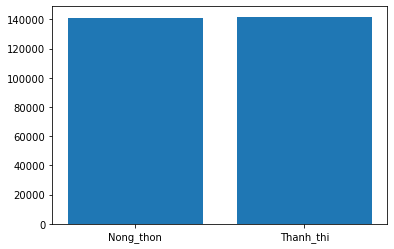

In [47]:
Area_group = df.groupby('Area')
ARPU_tong_group = Area_group.mean()['ARPU_tong ']

Areas = [Area for Area, df in Area_group]
plt.bar(Areas,ARPU_tong_group)

<BarContainer object of 2 artists>

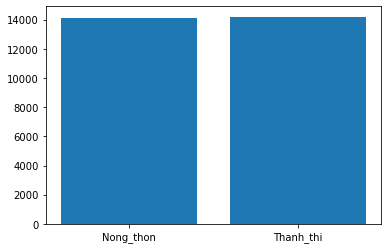

In [50]:
Area_group = df.groupby('Area')
ARPU_napthe_group = Area_group.mean()['ARPU_napthe']

Areas = [Area for Area, df in Area_group]
plt.bar(Areas,ARPU_napthe_group)

<BarContainer object of 2 artists>

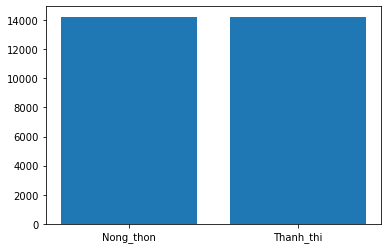

In [51]:
Area_group = df.groupby('Area')
ARPU_napthe_1_group = Area_group.mean()['ARPU_napthe_1']

Areas = [Area for Area, df in Area_group]
plt.bar(Areas,ARPU_napthe_1_group)

KẾT LUẬN

Trong trường hợp số khách hành ở nông thôn nhiều hơn, em xét đến yếu tố đó là trung bình doanh thu tiêu dùng và nạp thẻ của mỗi khách hàng.
ta có thể thấy số doanh thu mỗi người của thành thị và nông thôn ngang nhau, thậm chí có phần nhỉnh hơn. Phân tích tương tự với các biến số phút gọi nội và ngoại mạng. Cũng như với lưu lượng data đã sử dụng đều trả ra kết quả tương tự là khu vực nông thôn và thành thị trung bình khách hàng sử dụng gần như ngang nhau. 

Từ đó ta có thể kết luận, Mối tương quan của khu vực gồm thành thị và nông thôn trong bộ dữ liệu này không ảnh hưởng nhiều đến hành vi khách hàng, khách hàng ở thành thị có xu hướng nhiều hơn 1 chút nhưng không đáng kể. Nếu có, chỉ là khách hàng ở nông thôn có xu hướng dùng phổ biến hơn so với thành thị do có thể được nhiều yếu tố khác tác động đến như Marketing, brand, sale hiệu quả.

# 3. PHÂN NHÓM KHÁCH HÀNG

## 3.1. Xét nhân khẩu học

In [62]:
df.groupby('Phan_nhom').mean()

,Tieu_dung_SMS,Luu_luong_GB_Data,Tien_nap_the,tieudung_SMS_1,luuLuong_Data_1,Tien_nap_the_1,tieudung_thoai_noi,Tieudung_thoai_noi_1,Tieudung_thoai_ngoai,So_ngay_dung_Data,...,Age,DOU_MB_data_1thang,DOU_thoai_1thang,ARPU_tong,ARPU_tong_1,ARPU_napthe,ARPU_napthe_1,ARPU_Data,ARPU_Data_1,Tieudung_tang
Phan_nhom,,,,,,,,,,,,,,,,,,,,,
1,16555.426543,5708.995482,14199.534360,23451.612390,6588.459870,14257.439935,32535.046845,77856.432724,32189.417442,19.283204,...,17.963789,6148.727676,36.075362,92473.780399,180943.814207,14199.534360,14257.439935,11193.889569,13135.908579,-48.560297
2,19653.802189,5741.343246,14167.308528,21842.183481,6566.748124,14225.517518,60714.660372,66071.900897,52564.993503,19.442506,...,17.986307,6154.045685,36.184128,145380.620911,157381.475002,14167.308528,14225.517518,12447.164846,12622.182772,-6.723413
3,20958.507797,5739.967527,14118.896381,18403.578037,6560.265251,14179.494916,75149.957141,38732.068747,64371.459853,19.356878,...,18.003432,6150.116389,36.192731,173653.846699,104618.552983,14118.896381,14179.494916,13173.921909,11450.237561,82.474752


### 3.1.1. Mối quan hệ giữa nhóm và khu vực

In [65]:
Area_check = pd.crosstab(index=df['Area'],
                             columns=df['Phan_nhom'],
                             normalize="index")
Area_check

Phan_nhom,1,2,3
Area,,,
Nong_thon,0.256689,0.410197,0.333114
Thanh_thi,0.254677,0.409669,0.335653


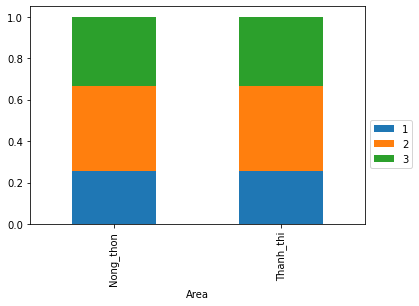

In [66]:
area_chart = Area_check.plot(kind='bar', stacked=True)
area_chart.legend(bbox_to_anchor =(1, 0.5))

#### *xét thấy tỉ trọng nhóm ở 2 khu vực là ngang nhau, nhóm 2 chiếm nhiều nhất

### 3.1.2. Mối quan hệ giữa nhóm và độ tuổi

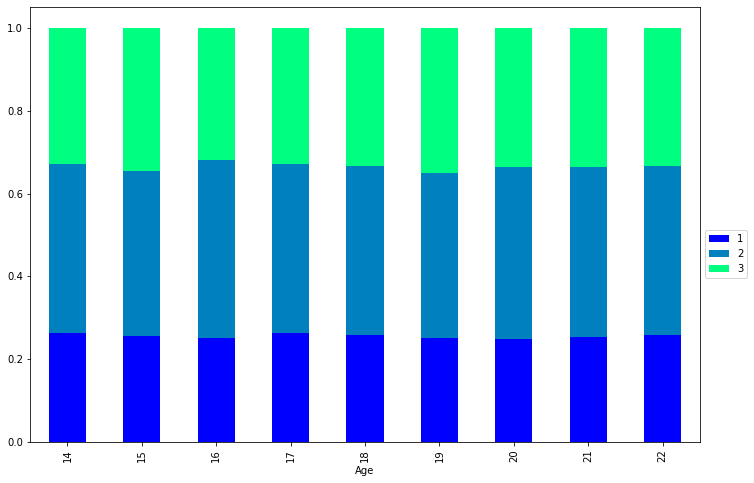

In [68]:
Age_check = pd.crosstab(index=df['Age'],
                             columns=df['Phan_nhom'],
                             normalize="index")

# create plot
Age_chart = Age_check.plot(kind='bar', 
                    stacked=True, 
                    colormap='winter', 
                    figsize=(12, 8))
Age_chart.legend(bbox_to_anchor =(1, 0.5))



## 3.2. lưu lượng sử dụng thoại theo phút 

In [96]:
df['Phan_nhom'].value_counts()

2    13584
3    11071
1     8478
Name: Phan_nhom, dtype: int64

In [72]:
df['Luu_luong_phut_thoai_noi'].describe()

count    33133.000000
mean        16.715765
std          9.605325
min          0.000000
25%          8.380000
50%         16.750000
75%         25.000000
max         33.390000
Name: Luu_luong_phut_thoai_noi, dtype: float64

In [102]:
df['Luu_luong_phut_thoai_noi_1'].describe()

count    33133.000000
mean        17.016373
std          9.844685
min          0.000000
25%          8.400000
50%         17.080000
75%         25.470000
max         34.070000
Name: Luu_luong_phut_thoai_noi_1, dtype: float64

In [101]:
df['Luu_luong_phut_thoai_ngoai'].describe()

count    33133.000000
mean        19.159139
std         11.092453
min          0.000000
25%          9.520000
50%         19.090000
75%         28.820000
max         38.340000
Name: Luu_luong_phut_thoai_ngoai, dtype: float64

In [103]:
df['Luu_luong_phut_thoai_ngoai_1'].describe()

count    33133.000000
mean        19.427066
std         11.162411
min          0.000000
25%          9.770000
50%         19.430000
75%         29.150000
max         38.660000
Name: Luu_luong_phut_thoai_ngoai_1, dtype: float64

In [104]:
nhom_group = df.groupby('Phan_nhom')
tieudung_noi_group = nhom_group.mean()['tieudung_thoai_noi']
tieudung_noi_group

Phan_nhom
1    32535.046845
2    60714.660372
3    75149.957141
Name: tieudung_thoai_noi, dtype: float64

In [106]:
nhom_group = df.groupby('Phan_nhom')
tieudung_noi_1_group = nhom_group.mean()['Tieudung_thoai_noi_1']
tieudung_noi_1_group

Phan_nhom
1    77856.432724
2    66071.900897
3    38732.068747
Name: Tieudung_thoai_noi_1, dtype: float64

-> Tiêu dùng thoại nội và ngoại giảm với nhóm 1 và 2, nhóm 3 tăng qua tháng

In [138]:
nhom_group = df.groupby('Phan_nhom')
thoainoi_group = nhom_group.mean()['Luu_luong_phut_thoai_noi']
thoainoi_group

Phan_nhom
1    16.582793
2    16.730810
3    16.799134
Name: Luu_luong_phut_thoai_noi, dtype: float64

In [100]:
nhom_group = df.groupby('Phan_nhom')
thoainoi_1_group = nhom_group.mean()['Luu_luong_phut_thoai_noi_1']
thoainoi_1_group

Phan_nhom
1    16.873668
2    17.076182
3    17.052269
Name: Luu_luong_phut_thoai_noi_1, dtype: float64

In [76]:
nhom_group = df.groupby('Phan_nhom')
thoaingoai_group = nhom_group.mean()['Luu_luong_phut_thoai_ngoai']
thoaingoai_group

Phan_nhom
1    19.287083
2    19.134271
3    19.091675
Name: Luu_luong_phut_thoai_ngoai, dtype: float64

In [79]:
nhom_group = df.groupby('Phan_nhom')
thoaingoai_1_group = nhom_group.mean()['Luu_luong_phut_thoai_ngoai_1']
thoaingoai_1_group

Phan_nhom
1    19.407179
2    19.426994
3    19.442386
Name: Luu_luong_phut_thoai_ngoai_1, dtype: float64

-> Lưu lượng sử dụng thoại nội và ngoại giảm qua tháng giảm đều với cả 3 nhóm khách hàng

In [81]:
nhom_group = df.groupby('Phan_nhom')
DOU_thoai_group = nhom_group.mean()['DOU_thoai_1thang']
DOU_thoai_group

Phan_nhom
1    36.075362
2    36.184128
3    36.192731
Name: DOU_thoai_1thang, dtype: float64

<AxesSubplot:xlabel='DOU_thoai_1thang_binned', ylabel='Count'>

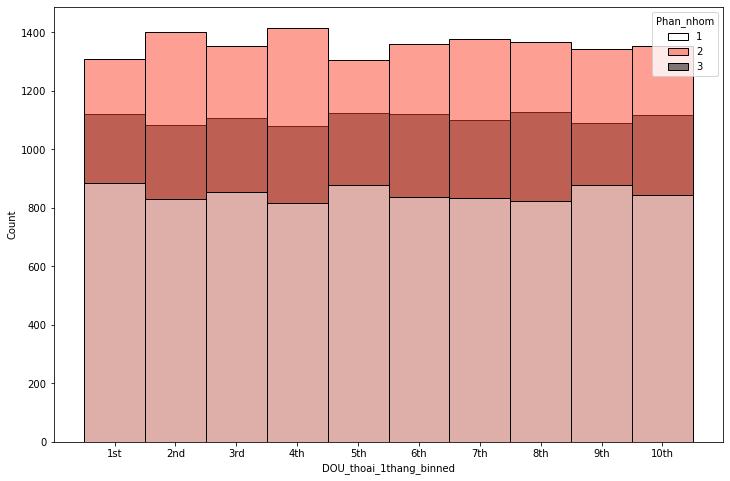

In [80]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
df.loc[:,'DOU_thoai_1thang_binned'] = pd.qcut(df['DOU_thoai_1thang'], q=10, labels=['1st','2nd','3rd','4th','5th','6th','7th','8th','9th','10th'])

sns.histplot(data=df, x="DOU_thoai_1thang_binned", hue='Phan_nhom', palette='CMRmap_r', ax=ax1)

có 10 mức độ của trung bình phút gọi tháng và cả 3 nhóm đều được phân bổ đều vào từng mức độ cho thấy nhu cầu tiêu dùng của từng nhóm là gần như giống nhau

## 3.3. lưu lượng sử dụng thoại theo Data

In [83]:
nhom_group = df.groupby('Phan_nhom')
data_group = nhom_group.mean()['Luu_luong_GB_Data']
data_group

Phan_nhom
1    5708.995482
2    5741.343246
3    5739.967527
Name: Luu_luong_GB_Data, dtype: float64

In [84]:
nhom_group = df.groupby('Phan_nhom')
data_1_group = nhom_group.mean()['luuLuong_Data_1']
data_1_group

Phan_nhom
1    6588.459870
2    6566.748124
3    6560.265251
Name: luuLuong_Data_1, dtype: float64

In [85]:
nhom_group = df.groupby('Phan_nhom')
DOU_data_group = nhom_group.mean()['DOU_MB_data_1thang']
DOU_data_group

Phan_nhom
1    6148.727676
2    6154.045685
3    6150.116389
Name: DOU_MB_data_1thang, dtype: float64

<AxesSubplot:xlabel='DOU_MB_data_1thang_binned'>

<Figure size 720x576 with 0 Axes>

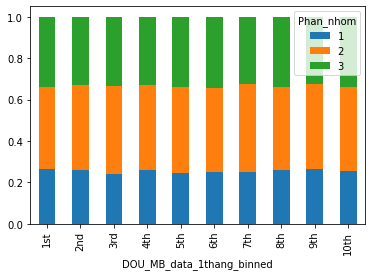

In [88]:
plt.figure(figsize=(10,8))
cross_tab_check2 = pd.crosstab(index=df['DOU_MB_data_1thang_binned'],
                             columns=df['Phan_nhom'],
                             normalize="index")
cross_tab_check2.plot(kind='bar', stacked=True)

-> tiêu dùng Data được phân bổ vào 10 loại tiêu dùng data đều theo tỷ lệ như số lượng khách hàng mỗi nhóm. Từ đó cho thấy nhu cầu dùng data của 3 nhóm khách hàng gần như giống nhau.

## 4. Giải quyết vấn đề và giải pháp

### 4.1. Tại sao nhóm 3 mặc dù lưu lượng sử dụng Data và tổng gọi thoại giảm nhưng tiêu dùng của họ cho Data và tổng gọi thoại vẫn tăng

In [134]:
df['Goi_Data_tn'].value_counts()

-            4671
TRE60        1637
ST5K         1553
V90X         1350
ST15K        1189
             ... 
MIMAX1.5X       1
3CT50           1
PYN90           1
HT100           1
AGG50           1
Name: Goi_Data_tn, Length: 354, dtype: int64

In [135]:
df['Goi_Data_tn_1'].value_counts()

-            5017
V90X         1475
TRE60        1301
ST5K         1293
ST90K        1242
             ... 
MI5K            1
QNM90           1
TVH90           1
6KHA90_60       1
CN5K            1
Name: Goi_Data_tn_1, Length: 359, dtype: int64

In [131]:
solve_problem = df[ df['Goi_Data_tn'] == 'TRE60']
solve_problem['Phan_nhom'].value_counts()

2    641
3    555
1    441
Name: Phan_nhom, dtype: int64

In [132]:
solve_problem = df[ df['Goi_Data_tn_1'] == 'TRE60']
solve_problem['Phan_nhom'].value_counts()

2    535
3    438
1    328
Name: Phan_nhom, dtype: int64

nhóm 3 thường có xu hướng mua các gói cước hơn để được hưởng nhiều tiêu dùng về thoại, data và sms trong khi họ giảm đi lưu lượng dùng

## THANKS FOR READING